In [131]:
#Aula 2 importação
!pip install mplfinance
#Lendo arquivos
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [132]:
df_principal = pd.read_excel("/content/original  Imersão Python - Tabela de ações.xlsx", sheet_name="Principal")
df_principal.head(10)


,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"
5,PRIO3,2024-01-26,45.69,1.98,2.42,-0.78,-0.78,8.08,44.25,45.69,"319,92 M"
6,PETR4,2024-01-26,39.96,1.73,6.47,7.30,7.30,95.01,38.91,40.09,"1,64 B"
7,VALE3,2024-01-26,69.50,1.66,2.06,-9.97,-9.97,-23.49,67.50,69.81,"1,89 B"
8,MULT3,2024-01-26,28.19,1.58,2.03,-0.81,-0.81,24.02,27.71,28.36,"104,16 M"
9,ITUB4,2024-01-26,32.81,1.48,-0.39,-3.36,-3.36,34.25,32.35,32.91,"473,2 M"


In [133]:
df_total_acoes = pd.read_excel("/content/original  Imersão Python - Tabela de ações.xlsx", sheet_name="Total_de_acoes")
# df_total_acoes

In [134]:
df_ticker = pd.read_excel("/content/original  Imersão Python - Tabela de ações.xlsx", sheet_name="Ticker")
# df_ticker

In [135]:
df_chatgpt = pd.read_excel("/content/original  Imersão Python - Tabela de ações.xlsx", sheet_name="Chatgpt")
# df_chatgpt

In [136]:
# cria novo data frame com as colunas selecionadas
df_principal = df_principal[['Ativo','Data','Último (R$)','Var. Dia (%)']].copy()
df_principal

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [137]:
df_principal = df_principal.rename(columns={'Último (R$)':'Valor_final','Var. Dia (%)':'Var_dia_pct'}).copy()
df_principal

,Ativo,Data,Valor_final,Var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [138]:
#cria uma nova coluna no Data frame
df_principal['Var_pct'] = df_principal['Var_dia_pct']/100
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct
0,USIM5,2024-01-26,9.50,5.20,0.05
1,CMIN3,2024-01-26,6.82,2.40,0.02
2,PETR3,2024-01-26,41.96,2.19,0.02
3,SUZB3,2024-01-26,52.91,2.04,0.02
4,CPFE3,2024-01-26,37.10,2.03,0.02
...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02
77,BHIA3,2024-01-26,8.70,-2.46,-0.02
78,RENT3,2024-01-26,56.24,-3.63,-0.04
79,CVCB3,2024-01-26,3.07,-4.36,-0.04


In [139]:
df_principal['Valor_inicial'] = df_principal['Valor_final']/ (df_principal['Var_pct'] + 1)
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21


In [140]:
#unime colunas de um tabela a tabela principal
df_principal = df_principal.merge(df_total_acoes,left_on='Ativo', right_on='Código', how='left' )
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,USIM5,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,CMIN3,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,PETR3,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,SUZB3,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,CPFE3,187732538.00
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,CRFB3,533990587.00
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,BHIA3,94843047.00
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,RENT3,853202347.00
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,CVCB3,525582771.00


In [141]:
#exclui uma coluna
df_principal = df_principal.drop(columns=['Código'])
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00


In [142]:
df_principal['Variacao_rs'] = (df_principal['Valor_final'] - df_principal['Valor_inicial']) * df_principal['Qtde. Teórica']
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00,-73557408.06


In [143]:
pd.options.display.float_format = '{:.2f}'.format
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00,-73557408.06


In [144]:
df_principal['Qtde. Teórica']= df_principal['Qtde. Teórica'].astype(int)
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [145]:
df_principal = df_principal.rename(columns={'Qtde. Teórica':'Qtd_teorica'}).copy()
# df_principal

In [146]:
df_principal['Resultado'] = df_principal['Variacao_rs'].apply(lambda x: 'Subiu' if x > 0 else ('Desceu' if x< 0 else 'Estável'))
# df_principal.head(50)

In [147]:
df_principal = df_principal.merge(df_ticker, left_on='Ativo', right_on='Ticker', how='left')
df_principal = df_principal.drop(columns=['Ticker'])
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC


In [148]:
df_principal = df_principal.merge(df_chatgpt, left_on='Nome', right_on='Nome da Empresa', how='left')
df_principal = df_principal.drop(columns=['Nome da Empresa'])
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,64
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,77
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,69
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,97
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,108
...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo,34
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo,64
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Aluguel de Carros,49
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,49


In [149]:
df_principal['Cat_idade'] = df_principal['Idade'].apply(lambda x: 'Mais de 100' if x > 100 else ('Menos de 50' if x < 50 else 'Entre 50 e 100'))
df_principal


,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Idade,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,64,Entre 50 e 100
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,77,Entre 50 e 100
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,69,Entre 50 e 100
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,97,Entre 50 e 100
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,108,Mais de 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo,34,Menos de 50
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo,64,Entre 50 e 100
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Aluguel de Carros,49,Menos de 50
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,49,Menos de 50


In [150]:
#Analises
maior = df_principal['Variacao_rs'].max()
menor = df_principal['Variacao_rs'].min()
media = df_principal['Variacao_rs'].mean()
media_subiu = df_principal[df_principal['Resultado'] == 'Subiu']['Variacao_rs'].mean()
media_desceu = df_principal[df_principal['Resultado'] == 'Desceu']['Variacao_rs'].mean()

#ao inserir uma coluna deve se especificar o nome de todas
analise = [['maior',maior], ['menor',menor], ['media',media], ['media subiu',media_subiu],['media desceu', media_desceu]]
df_analise = pd.DataFrame(analise, columns=['Analise',''])
df_analise

,Analise,
0,maior,4762926995.25
1,menor,-1807432634.46
2,media,165190210.48
3,media subiu,448164250.23
4,media desceu,-181109141.75


In [151]:
df_principal_subiu = df_principal[df_principal['Resultado'] == 'Subiu']
df_principal_subiu

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Idade,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,64,Entre 50 e 100
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,77,Entre 50 e 100
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,69,Entre 50 e 100
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,97,Entre 50 e 100
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,108,Mais de 100
5,PRIO3,2024-01-26,45.69,1.98,0.02,44.80,800010734,709687498.18,Subiu,PetroRio,Petróleo,11,Menos de 50
6,PETR4,2024-01-26,39.96,1.73,0.02,39.28,4566445852,3103136291.22,Subiu,Petrobras,Petróleo e Gás,69,Entre 50 e 100
7,VALE3,2024-01-26,69.50,1.66,0.02,68.37,4196924316,4762926995.25,Subiu,Vale,Mineração,80,Entre 50 e 100
8,MULT3,2024-01-26,28.19,1.58,0.02,27.75,268505432,117732680.08,Subiu,Multiplan,Shopping Centers,50,Entre 50 e 100
9,ITUB4,2024-01-26,32.81,1.48,0.01,32.33,4801593832,2297591984.33,Subiu,Itaú Unibanco,Serviços Financeiros,13,Menos de 50


In [152]:
#agregação
# grupby cria um vetor, reset transforma novamente em df
df_analise_segmento = df_principal_subiu.groupby('Segmento')['Variacao_rs'].sum().reset_index()
df_analise_segmento

,Segmento,Variacao_rs
0,Alimentos,407833683.09
1,Construção Civil,37525872.38
2,Educação,72295838.99
3,Energia,1209821623.57
4,Holding,416092244.42
5,Logística,4131341.16
6,Mineração,4958511412.16
7,Moda,41021792.09
8,Papel e Celulose,722946282.71
9,Petróleo,850093147.52


In [153]:
df_analise_saldo = df_principal.groupby('Resultado')['Variacao_rs'].sum().reset_index()
df_analise_saldo

,Resultado,Variacao_rs
0,Desceu,-6338819961.32
1,Estável,0.00
2,Subiu,19719227010.14


In [154]:
#graficos
fig = px.bar(df_analise_saldo, x='Resultado', y='Variacao_rs', text='Variacao_rs',title='Variação Reais por Resultado')
fig.show()


In [155]:
fig= px.pie(df_analise_segmento, names='Segmento', values='Variacao_rs', title='Variação Reais por Segmento')
fig.show()

In [156]:


df_analise_cat_idade = df_principal.groupby('Cat_idade')['Variacao_rs'].sum().reset_index()
df_analise_segmento

fig = px.bar(df_analise_cat_idade, x='Cat_idade', y='Variacao_rs', text='Variacao_rs', title='Variação Reais por Categoria de Idade')
fig.show()

In [158]:
dados_petro = yf.download('PETR4.SA', start='2023-01-01', end='2024-03-01')
#renomeando colunas
dados_petro.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_ajust','Volume']
dados_petro = dados_petro.rename_axis('Data')
dados_petro

[*********************100%%**********************]  1 of 1 completed


,Abertura,Maximo,Minimo,Fechamento,Fech_ajust,Volume
Data,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2024-02-23,42.14,42.24,41.61,41.90,41.90,43924500
2024-02-26,41.90,42.73,41.83,42.69,42.69,25885700
2024-02-27,42.70,42.82,42.38,42.63,42.63,27678100


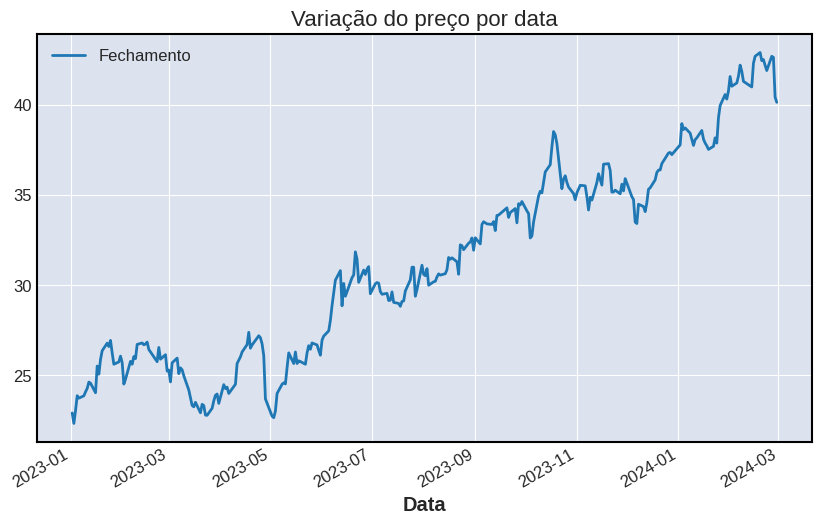

In [159]:
dados_petro['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])


In [160]:
df_candle_petro=dados_petro.head(120).copy()
df_candle_petro['Data'] = df_candle_petro.index
df_candle_petro['Data'] = df_candle_petro['Data'].apply(mdates.date2num)
df_candle_petro


,Abertura,Maximo,Minimo,Fechamento,Fech_ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700,19359.00
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300,19360.00
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000,19361.00
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000,19362.00
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500,19363.00
...,...,...,...,...,...,...,...
2023-06-20,30.30,30.75,29.90,30.57,28.35,55605300,19528.00
2023-06-21,30.93,32.00,30.85,31.85,29.54,89294300,19529.00
2023-06-22,31.46,31.69,31.08,31.45,29.17,43455800,19530.00


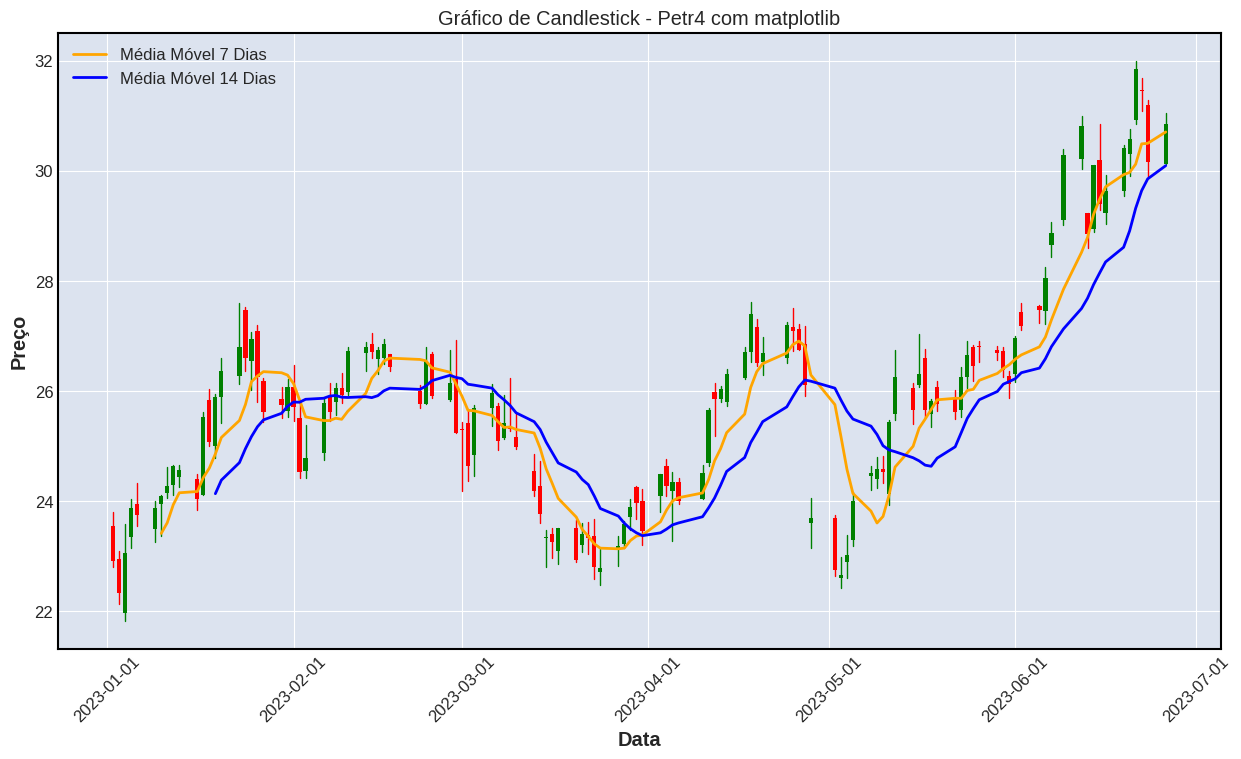

In [161]:
#fig éo grafico, ax o pincel que desenha o graficos
fig, ax = plt.subplots(figsize=(15,8))
width = .7
for i in range(len(df_candle_petro)):
  if df_candle_petro['Fechamento'].iloc[i] > df_candle_petro['Abertura'].iloc[i]:
    color = 'green'
  else:
    color = 'red'

  ax.plot([df_candle_petro['Data'].iloc[i], df_candle_petro['Data'].iloc[i]],
         [df_candle_petro['Minimo'].iloc[i], df_candle_petro['Maximo'].iloc[i]],
         color=color,
         linewidth=1)

  ax.add_patch(plt.Rectangle((df_candle_petro['Data'].iloc[i] - width/2, min(df_candle_petro['Abertura'].iloc[i], df_candle_petro['Fechamento'].iloc[i])),
    width,
    abs(df_candle_petro['Fechamento'].iloc[i] - df_candle_petro['Abertura'].iloc[i]),
    facecolor = color)),
#cria as medias moveis
#rooling faz a rolagem do periodo
df_candle_petro['MA7'] = df_candle_petro['Fechamento'].rolling(window=7).mean()
df_candle_petro['MA14'] = df_candle_petro['Fechamento'].rolling(window=14).mean()
#plota as linhas da media movel
ax.plot(df_candle_petro['Data'], df_candle_petro['MA7'], color='orange', label='Média Móvel 7 Dias')
ax.plot(df_candle_petro['Data'], df_candle_petro['MA14'], color='blue', label='Média Móvel 14 Dias')
#plota as legendas
ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title('Gráfico de Candlestick - Petr4 com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)
plt.show()


In [168]:
#grafico interativo

fig_petro = make_subplots(rows=2, cols=1, shared_xaxes= True,
      vertical_spacing=0.1,
      subplot_titles=('Candlesticks', 'Volume Transacionado'),
      row_width=[0.2, 0.7])

fig_petro.add_trace(go.Candlestick(
      x=df_candle_petro.index,
      open = df_candle_petro['Abertura'],
      high  =df_candle_petro['Maximo'],
      low = df_candle_petro['Minimo'],
      close = df_candle_petro['Fechamento'],
      name ='Candlestick'),
      row = 1, col = 1)

fig_petro.add_trace(go.Scatter(
    x= df_candle_petro.index,
    y= df_candle_petro['MA7'],
    mode= 'lines',
    name= 'MA7 - Média Móvel 7 Dias'),
    row= 1, col= 1)

fig_petro.add_trace(go.Scatter(
      x = df_candle_petro.index,
      y = df_candle_petro['MA14'],
      mode = 'lines',
      name = 'MA14 - Média Móvel 14 Dias'),
      row = 1, col = 1)

fig_petro.add_trace(go.Bar(
      x = df_candle_petro.index,
      y = df_candle_petro['Volume'],
      name = 'Volume'),
      row = 2, col = 1)

fig_petro.update_layout(
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False,
    width = 1100, height = 600)

fig_petro.show()


[*********************100%%**********************]  1 of 1 completed


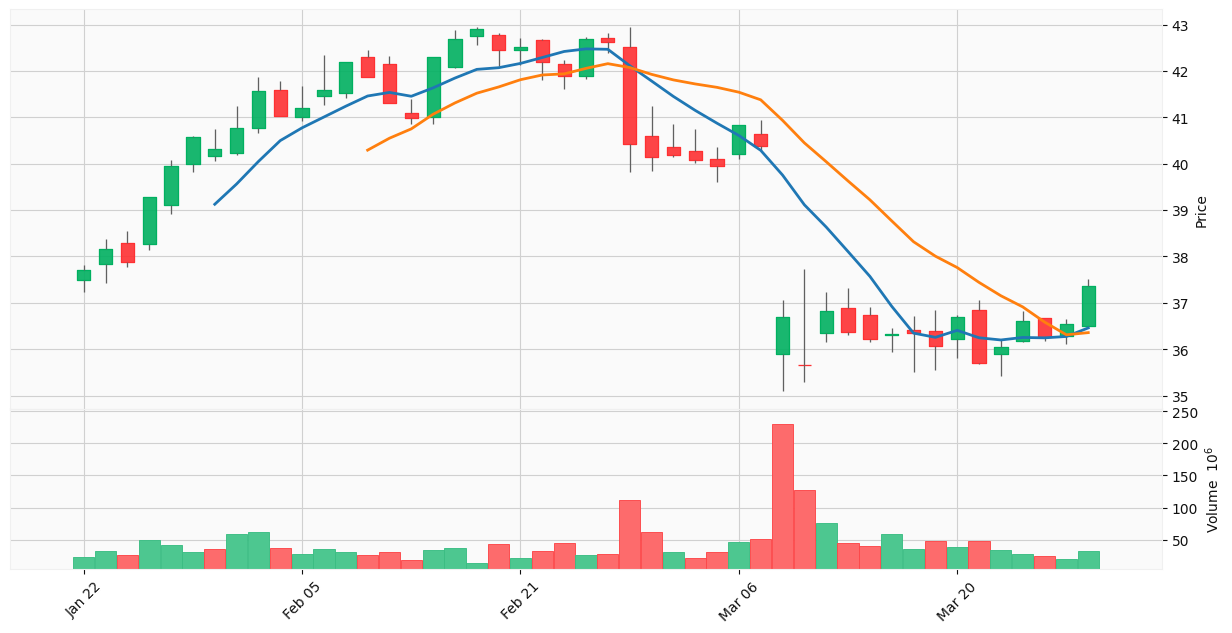

In [173]:
dados = yf.download('PETR4.SA', start='2024-01-21', end='2024-03-29')
mpf.plot(dados.head(120), type='candle', figsize= (16,8), volume=True, mav=(7,14), style='yahoo')

[*********************100%%**********************]  1 of 1 completed


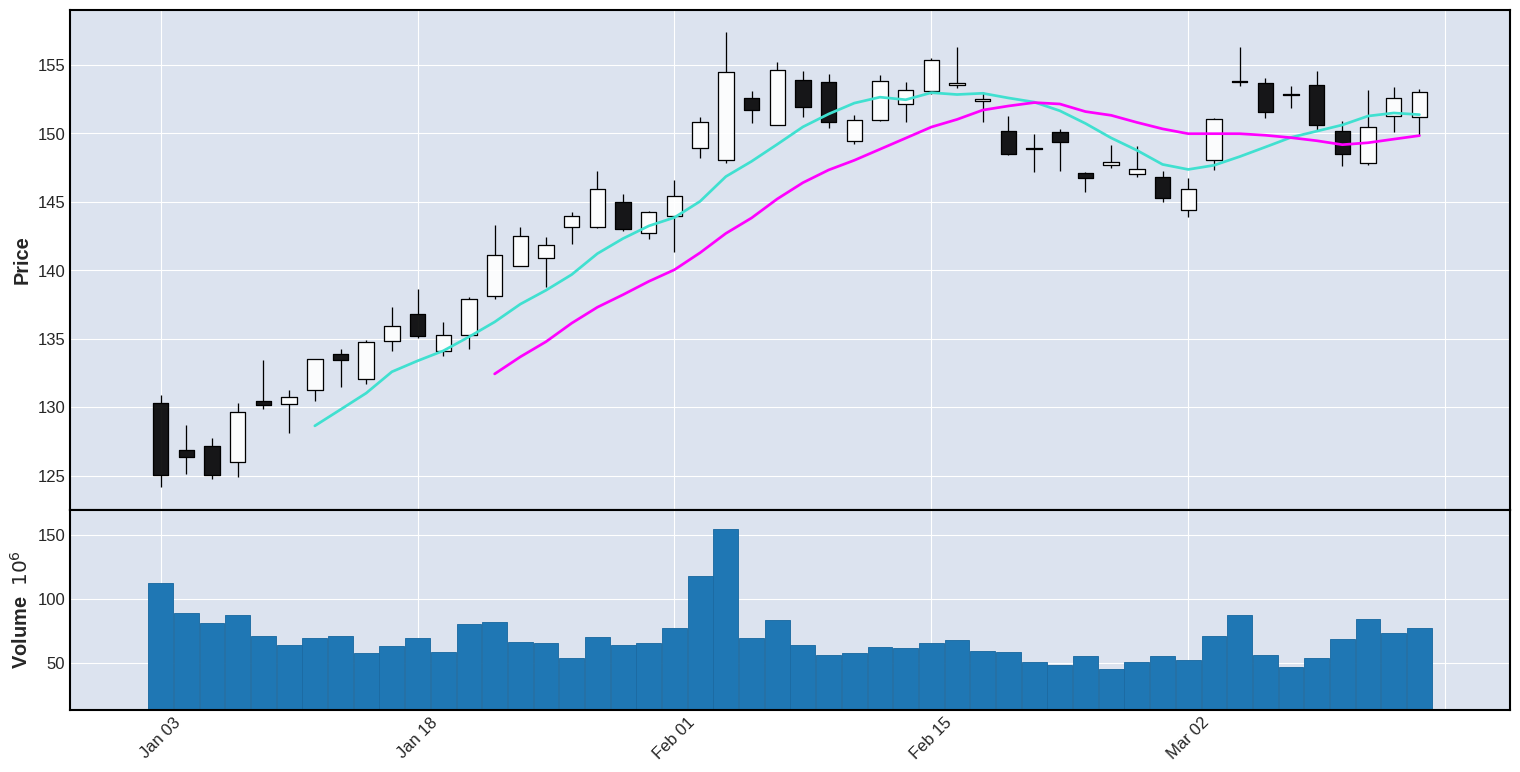

In [182]:
dados = yf.download('AAPL', start='2023-01-01', end='2024-03-28')
mpf.plot(dados.head(50), type='candle', figsize=(20,10), volume=True, mav=(7,14))
# dados

In [1]:
# dia 5
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
#prophet trabalha com series temporais
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099091,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432449,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216782,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198959,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [7]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date':'ds','Close':'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [9]:
#cria e treina o modelo
modelo = Prophet(weekly_seasonality= True,
                 yearly_seasonality= True,
                 daily_seasonality= False)
modelo.add_country_holidays(country_name='US')
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfakw1sz8/yy6iliih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfakw1sz8/rn874f6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76781', 'data', 'file=/tmp/tmpfakw1sz8/yy6iliih.json', 'init=/tmp/tmpfakw1sz8/rn874f6_.json', 'output', 'file=/tmp/tmpfakw1sz8/prophet_modelulw664wf/prophet_model-20240329191143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
#cria dtas futuras para previsao até final de 2023

futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,145.473723,155.677600,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,144.938913,155.473273,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,144.410411,154.583280,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,143.836508,154.264023,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,143.838536,154.204494,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,144.117809,165.414351,140.514076,159.227912,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.602463,4.602463,4.602463,0.0,0.0,0.0,154.573358
1045,2023-12-22,149.663754,144.196457,165.082190,140.375802,159.270770,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,4.732636,4.732636,4.732636,0.0,0.0,0.0,154.789936
1046,2023-12-23,149.611089,142.396742,164.559184,140.237527,159.250930,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.832364,4.832364,4.832364,0.0,0.0,0.0,153.893662
1047,2023-12-24,149.558424,142.850701,164.612026,140.099253,159.315950,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.900118,4.900118,4.900118,0.0,0.0,0.0,153.908751


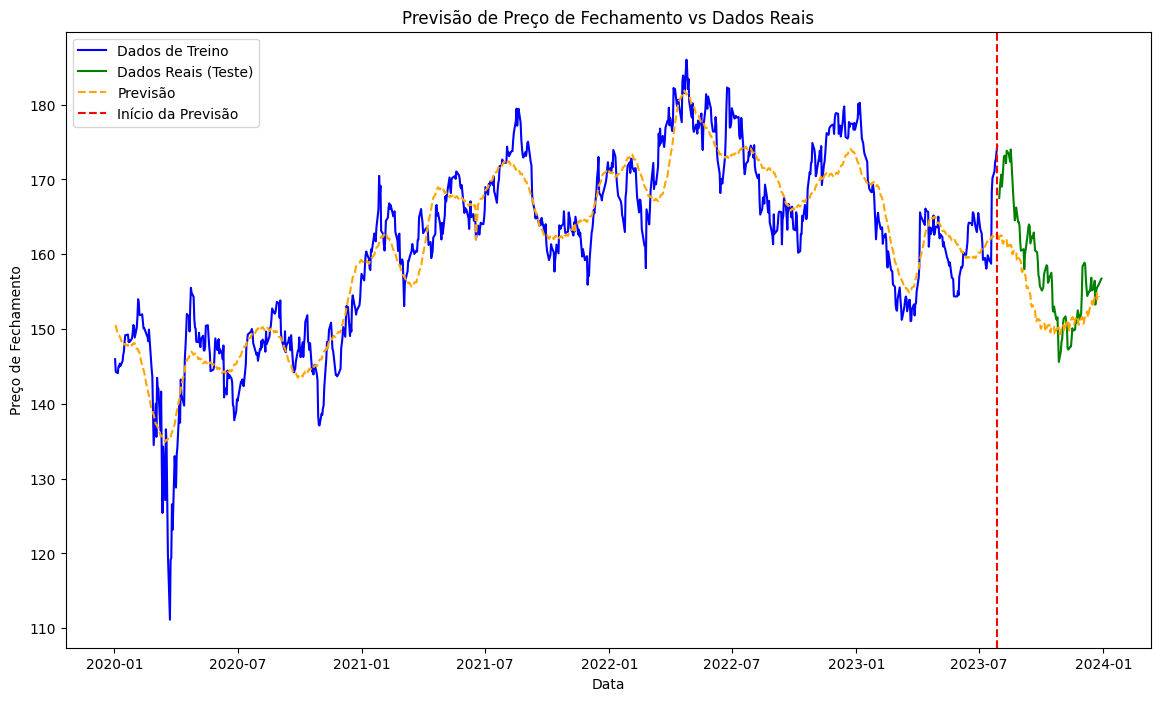

In [12]:
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color= 'blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color = 'orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()